Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

####  Since I have deferred from DSC31 and having done the assignment previously, I am hereby submitting the same file again, on which I worked hard to achieve the results

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import glob
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPool2D
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization

In [2]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

<b>I have used my local machine to work on this notebook, therefore all the paths / directories have been laid out in accordance.</b>

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset

data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train")   # Local machine path
data_dir_test = pathlib.Path('Skin cancer ISIC The International Skin Imaging Collaboration/Test')     # Local machine path

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
           data_dir_train,
           validation_split=0.2,
           subset="training",
           seed=123,
           image_size=(img_height, img_width),
           batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
         data_dir_train,
         validation_split=0.2,
         subset="validation",
         seed=123,
         image_size=(img_height, img_width),
         batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

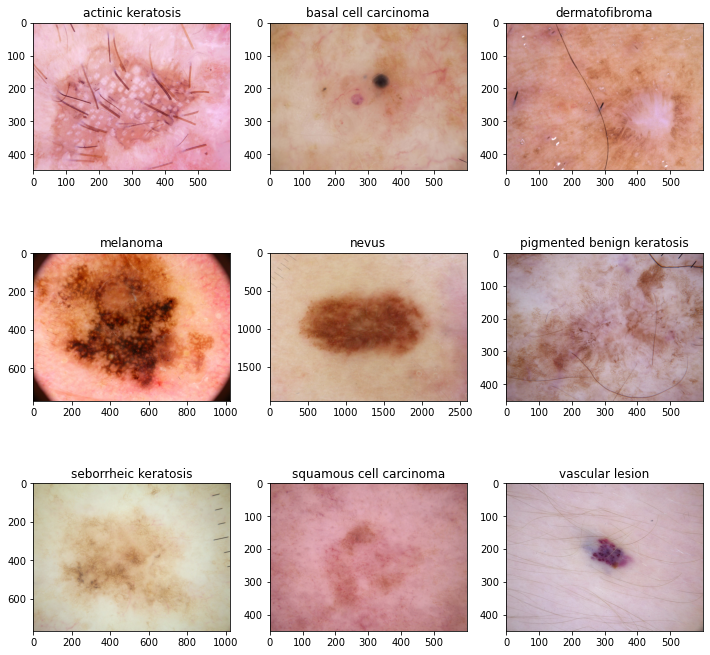

In [9]:
### your code goes here, you can use training or validation data to visualize


def VizInst():                                  # Defining a custom function
    plt.figure(figsize=(12, 12))
    for i in range(9):                          # Since there are 9 classes
        plt.subplot(3, 3, i + 1)                # Creating Subplots
        img = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[42]))     # Reading 42nd Image of all classes
        plt.title(class_names[i])
        plt.imshow(img)                         # Plotting the image
        

VizInst()   # Calling our function

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [11]:
### Your code goes here


model = Sequential()  # Building a Sequential model


model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180,3)))  # Rescaling to normalize
          

# First two layers of 32 filters with relu as activation function    
   
model.add(Conv2D(32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))    # MaxPool layer
          

# Second layers of 64 filters with relu as activation function   

model.add(Conv2D(64, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))          # MaxPool layer



model.add(Flatten())                            # Flattening Layer with relu as activation function
model.add(Dense(128, activation='relu'))
          

model.add(Dense(9, activation='softmax'))       # Dense Layer with softmax as activation function

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [12]:
### Todo, choose an appropirate optimiser and loss function

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),    # Because multiclass problem
              metrics=['accuracy'])

In [13]:
# View the summary of all layers

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 180, 180, 32)      2432      
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 180, 180, 32)      25632     
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 90, 90, 32)        0         
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 90, 90, 64)        51264     
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 45, 45, 64)        0         
_________________________________________________________________
module_wrapper_5 (ModuleWrap (None, 129600)            0

### Train the model

In [14]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 7s 43ms/step - loss: 2.5690 - accuracy: 0.2199 - val_loss: 2.0409 - val_accuracy: 0.2215
Epoch 2/20
56/56 [==============================] - 2s 30ms/step - loss: 2.0249 - accuracy: 0.2204 - val_loss: 2.0149 - val_accuracy: 0.1969
Epoch 3/20
56/56 [==============================] - 2s 32ms/step - loss: 2.0526 - accuracy: 0.1998 - val_loss: 2.0273 - val_accuracy: 0.2058
Epoch 4/20
56/56 [==============================] - 2s 31ms/step - loss: 2.0215 - accuracy: 0.1948 - val_loss: 2.0166 - val_accuracy: 0.2438
Epoch 5/20
56/56 [==============================] - 2s 30ms/step - loss: 2.0052 - accuracy: 0.2338 - val_loss: 2.0232 - val_accuracy: 0.2013
Epoch 6/20
56/56 [==============================] - 2s 29ms/step - loss: 1.9871 - accuracy: 0.2455 - val_loss: 2.0320 - val_accuracy: 0.3043
Epoch 7/20
56/56 [==============================] - 2s 30ms/step - loss: 2.0328 - accuracy: 0.2422 - val_loss: 2.0626 - val_accuracy: 0.1946
Epoch 8/20
56

### Visualizing training results

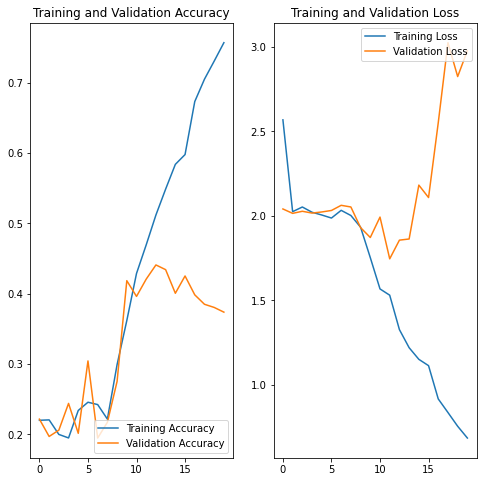

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

The Model is clearly `OVERFITTING` as evident by the large difference between training and validation accuracy,

This scenario, where training accuracy is very high and validation accuracy is very low resulting in the vast difference between both is a textbook case of overfitting, here our model is learning even the noise present in our dataset making it a high variance and low bias in nature, so we can rectify it using various techniques like adding dropouts, augmentation, handling class imbalance etc.

In [16]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

data_augmentation = tf.keras.Sequential( [ layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical', input_shape=(img_height,img_width,3)), 
                                           layers.experimental.preprocessing.RandomRotation(0.2), 
                                         ] )  # Horizonal and vertical flip, with random rotaion for augmentation 

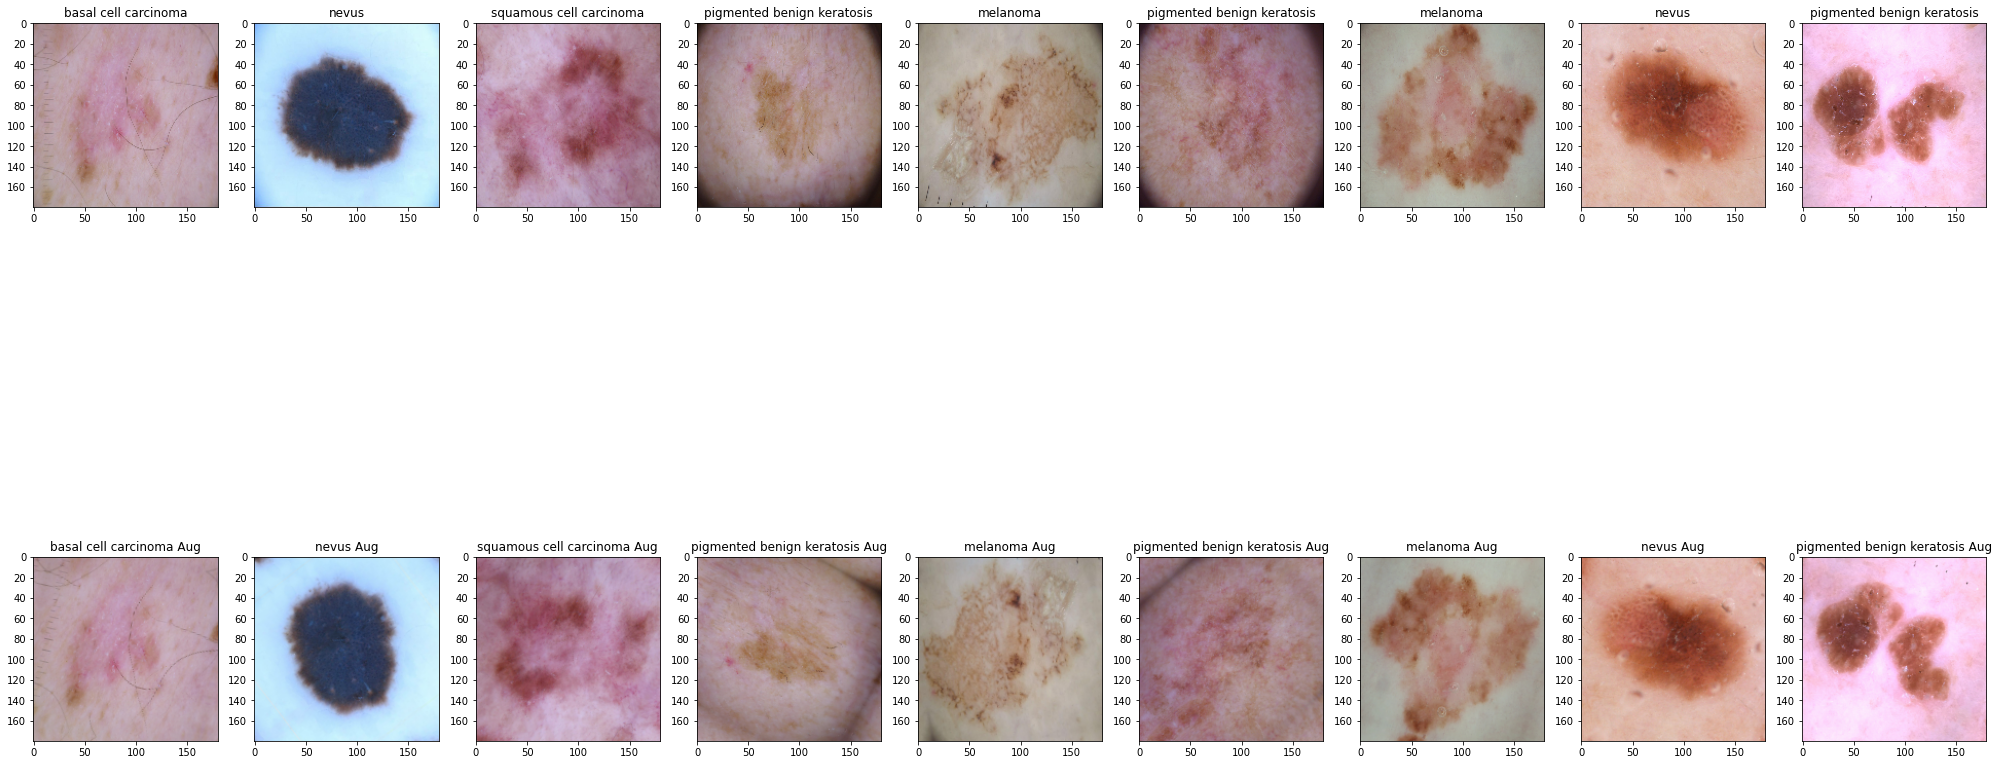

In [17]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

def VizAug():                                                              # Defining a custom function
        plt.figure(figsize=(35, 18))
        for img, lbl in train_ds.take(42):                                 # Indexing image and label name 
            for i in range(9):
                
                image = (img)[i].numpy().astype("uint8")                           # Saving image in a variable
                aug_image = data_augmentation(img)[i].numpy().astype("uint8")      # Saving augmented image in a variable
                
                plt.subplot(2, 9, i+1)
                plt.imshow(image)
                plt.title(class_names[lbl[i]]) 
                plt.subplot(2, 9, i+10)
                plt.imshow(aug_image)
                plt.title(class_names[lbl[i]]+' Aug')

VizAug()  # Calling our function

### Todo:
### Create the model, compile and train the model


In [18]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here


model = Sequential()              # Building a Sequential model
 

model.add(data_augmentation)      # Augmentation layer


model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180,3)))  # Rescalling to normalize
          

# First two layers of 32 filters with relu as activation function

model.add(Conv2D(32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))  # Maxpool layer
          

# Second layers of 64 filters with relu as activation function

model.add(Conv2D(64, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))   # Maxpool layer   


# Second layers of 128 filters with relu as activation function

model.add(Conv2D(128, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))   # Maxpool layer  


model.add(Dropout(0.25))   # Dropout to tackle overfitting  


model.add(Flatten())      # Flattening Layer with relu as activation function

model.add(Dense(256, activation='relu'))


model.add(Dropout(0.25))  # Dropout to tackle overfitting


model.add(Dense(9, activation='softmax'))    # Dense Layer with softmax as activation function

### Compiling the model

In [19]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
module_wrapper_8 (ModuleWrap (None, 180, 180, 32)      2432      
_________________________________________________________________
module_wrapper_9 (ModuleWrap (None, 180, 180, 32)      25632     
_________________________________________________________________
module_wrapper_10 (ModuleWra (None, 90, 90, 32)        0         
_________________________________________________________________
module_wrapper_11 (ModuleWra (None, 90, 90, 64)        51264     
_________________________________________________________________
module_wrapper_12 (ModuleWra (None, 45, 45, 64)       

### Training the model

In [21]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 3s 36ms/step - loss: 2.3057 - accuracy: 0.1953 - val_loss: 2.0318 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 2s 33ms/step - loss: 2.0318 - accuracy: 0.1808 - val_loss: 2.0246 - val_accuracy: 0.2058
Epoch 3/20
56/56 [==============================] - 2s 34ms/step - loss: 2.0260 - accuracy: 0.2048 - val_loss: 2.0583 - val_accuracy: 0.2103
Epoch 4/20
56/56 [==============================] - 2s 33ms/step - loss: 2.0293 - accuracy: 0.2031 - val_loss: 2.0308 - val_accuracy: 0.1924
Epoch 5/20
56/56 [==============================] - 2s 33ms/step - loss: 2.0232 - accuracy: 0.1981 - val_loss: 2.0302 - val_accuracy: 0.2058
Epoch 6/20
56/56 [==============================] - 2s 34ms/step - loss: 2.0186 - accuracy: 0.2087 - val_loss: 2.0618 - val_accuracy: 0.2081
Epoch 7/20
56/56 [==============================] - 2s 34ms/step - loss: 2.0112 - accuracy: 0.2227 - val_loss: 2.0458 - val_accuracy: 0.2081
Epoch 8/20
56

### Visualizing the results

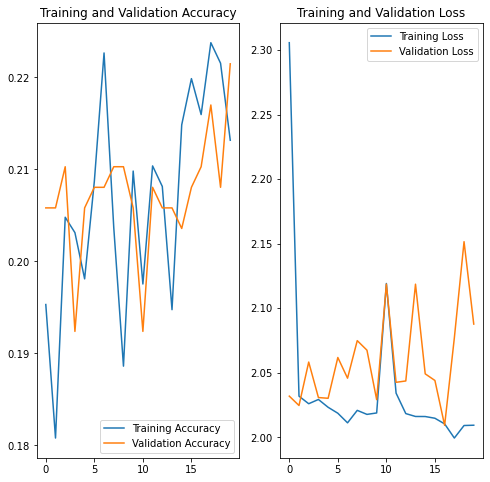

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

There is a an evidence of model `underfit`, comparing to past results we can see that overfitting is greatly reduced, so there is a little gain, but in terms of accuracy, we have lost more than what we have gained.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [23]:
## Your code goes here.

# Using os, getting length of total items present in each label


cnt = []                                             # Specifying a variable

for i in class_names:                                # Itetrating over label names
    cnt.append(len(os.listdir(f'Skin cancer ISIC The International Skin Imaging Collaboration/Train/{i}')))  # Local path

Count  = pd.DataFrame({'labels_name':class_names, 'cnt': cnt})  # Creating a dataframe

Count

,labels_name,cnt
0,actinic keratosis,114
1,basal cell carcinoma,376
2,dermatofibroma,95
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,462
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


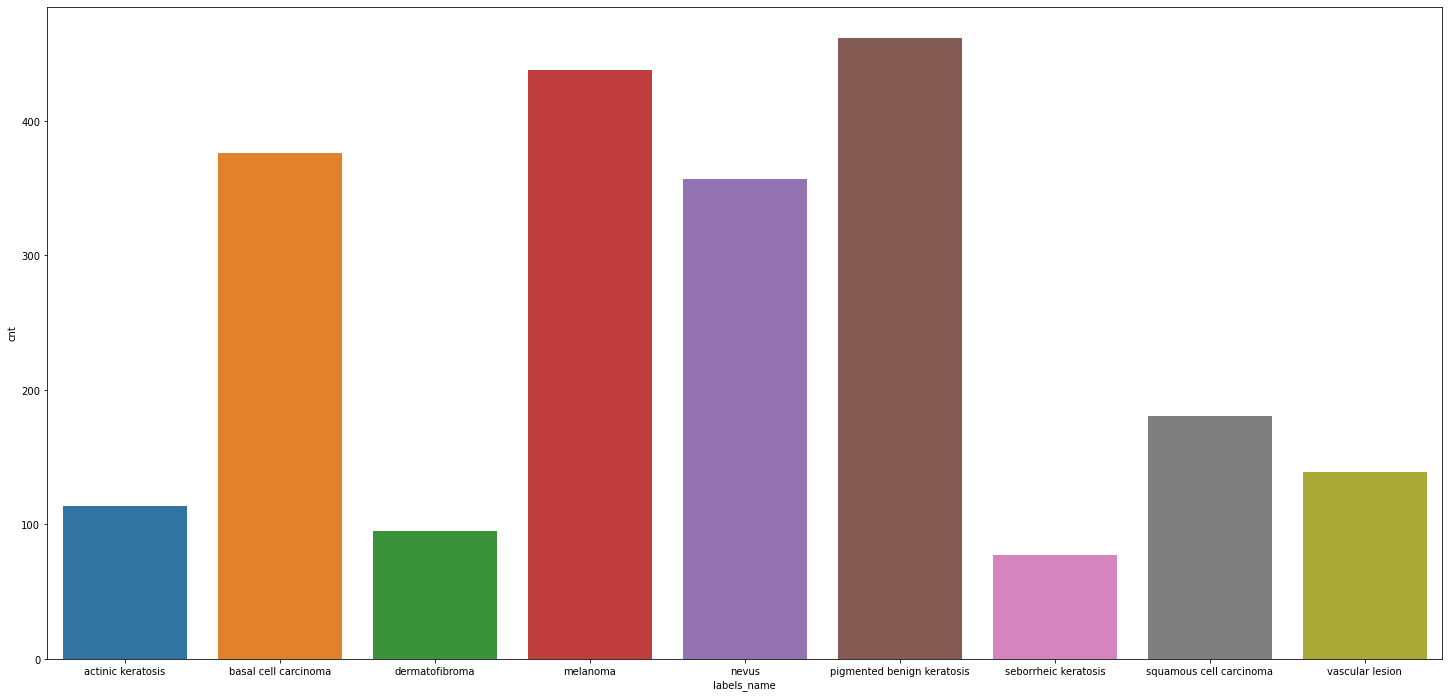

In [24]:
# Plotting the dataframe

plt.figure(figsize = (25,12))
sns.barplot(y = Count['cnt'], x = Count['labels_name'])
plt.show()

#### **Todo:** Write your findings here: 





#### - Which class has the least number of samples?

--> `seborrheic keratosis` with `77` sapmples has least number of samples in our dataset. 
    
    
    
    
#### - Which classes dominate the data in terms proportionate number of samples?

-->  `pigmented benign keratosis` with `462` samples clearly dominates our data in terms proportionate number of samples.  

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [25]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [26]:
path_to_training_dataset="Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x27F309934C0>: 100%|█| 500/500 [00:01<00:00, 398.20 Samples
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x28149B354F0>:   7%| | 37/500 [00:00<00:01, 238.26 Samples/

Initialised with 376 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x27F3D6B5C10>: 100%|█| 500/500 [00:01<00:
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x28149A99370>:   9%| | 47/500 [00:00<00:03, 137.62 Samples/

Initialised with 95 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x28149AC8F40>: 100%|█| 500/500 [00:01<00:
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3072x2304 at 0x281694D3310>: 100%|█| 500/500 [00:06<0
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=767x576 at 0x28149AD1FA0>:   1%| | 6/500 [00:00<00:14

Initialised with 357 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x27F3D70AB20>: 100%|█| 500/500 [00:05<00:00, 86.86 Samples/
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x27F655982B0>:   7%| | 36/500 [00:00<00:0

Initialised with 462 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x27F3D3AF070>: 100%|█| 500/500 [00:01<00:00, 427.03 Samples
Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x2814A439520>:   1%| | 6/500 [00:00<00:35, 13.83 Samples/s

Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x27F3DC3B4F0>: 100%|█| 500/500 [00:02<00
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x28149AE01F0>:  10%| | 48/500 [00:00<00:0

Initialised with 181 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x281497EBD30>: 100%|█| 500/500 [00:01<00:00, 425.58 Samples
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x27F65A57610>:   7%| | 34/500 [00:00<00:0

Initialised with 139 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x27F5C0B81F0>: 100%|█| 500/500 [00:01<00:


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [27]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [28]:
path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_5c6de268-1700-43cc-9270-da66153d5f40.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_b172c47d-52de-4675-a383-5758cfdf4f5a.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_c192d637-2d6f-4a3c-8e18-6d96a1da56a9.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_cd903215-1190-4f3d-aae7-9ea53c3a3e80.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_dfadc061-1cd1-4ea0-846c-936e86adb793.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train

In [29]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [30]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [31]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df2

In [32]:
new_df['Label'].value_counts()

basal cell carcinoma          500
squamous cell carcinoma       500
dermatofibroma                500
vascular lesion               500
melanoma                      500
seborrheic keratosis          500
nevus                         500
pigmented benign keratosis    500
actinic keratosis             500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [33]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [34]:
data_dir_train="Skin cancer ISIC The International Skin Imaging Collaboration/Train/"   # Local path
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [35]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [36]:
## your code goes here


model = Sequential()


model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180,3)))
          

model.add(Conv2D(32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
 
    
model.add(BatchNormalization())                                                          # Batch normalization


model.add(Conv2D(64, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))          


model.add(Dropout(0.25))


model.add(BatchNormalization())


model.add(Conv2D(128, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Dropout(0.25))


model.add(BatchNormalization())


model.add(Conv2D(128, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(BatchNormalization())
model.add(Dropout(0.5))



model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())


model.add(Dropout(0.5))


model.add(Dense(9, activation='softmax'))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [37]:
## your code goes here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
module_wrapper_20 (ModuleWra (None, 180, 180, 32)      2432      
_________________________________________________________________
module_wrapper_21 (ModuleWra (None, 180, 180, 32)      25632     
_________________________________________________________________
module_wrapper_22 (ModuleWra (None, 90, 90, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 90, 90, 32)        128       
_________________________________________________________________
module_wrapper_23 (ModuleWra (None, 90, 90, 64)        51264     
_________________________________________________________________
module_wrapper_24 (ModuleWra (None, 45, 45, 64)       

#### **Todo:**  Train your model

In [39]:
epochs = 30

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 12s 63ms/step - loss: 2.0548 - accuracy: 0.3500 - val_loss: 2.8017 - val_accuracy: 0.1329
Epoch 2/30
169/169 [==============================] - 10s 57ms/step - loss: 1.6411 - accuracy: 0.4305 - val_loss: 2.8881 - val_accuracy: 0.2428
Epoch 3/30
169/169 [==============================] - 10s 58ms/step - loss: 1.4247 - accuracy: 0.4930 - val_loss: 3.6624 - val_accuracy: 0.2353
Epoch 4/30
169/169 [==============================] - 10s 56ms/step - loss: 1.2791 - accuracy: 0.5332 - val_loss: 1.4703 - val_accuracy: 0.4796
Epoch 5/30
169/169 [==============================] - 10s 56ms/step - loss: 1.1427 - accuracy: 0.5764 - val_loss: 3.3966 - val_accuracy: 0.2539
Epoch 6/30
169/169 [==============================] - 10s 57ms/step - loss: 1.0490 - accuracy: 0.6248 - val_loss: 5.3175 - val_accuracy: 0.2249
Epoch 7/30
169/169 [==============================] - 10s 57ms/step - loss: 0.9188 - accuracy: 0.6601 - val_loss: 5.9642 - val_accuracy:

#### **Todo:**  Visualize the model results

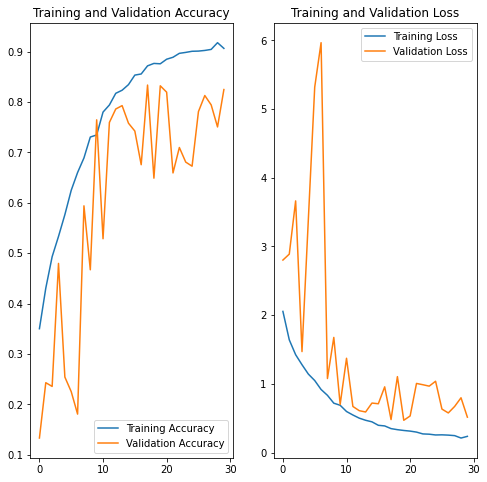

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



1. The performance of the model has greatly increased albeit some inconsistencies with overfitting,
2. Even though overfitting has been reduced to some extent, but it still persists as shown by spikes in our final model, indicating model is still overfitting
3. Class re-balance has proved to be quite effective, 
4. although the performance of the model can be increased further with hyperparameter tuning and increasing the size of layers and epochs with appropriate dropouts.